<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch05_06_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_LinearRegression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.06. 기초모델 구현 - Linear Regression
---
* 날짜: 2022-05-17
* 이름: 김민규

## 학습내용
    -  선형회귀의 프로세스에 대해 이해한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from google.colab import drive
sys.path.append('/content/drive/MyDrive/딥러닝 프레임워크실무/05.머신러닝기반데이터분석')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from data_loader import mpg_loader

In [ ]:
model = mpg_loader
model

<function data_loader.mpg_loader>

## 클래스 작성
---

In [ ]:
class LinearRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    self.w = self.seed.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
  
  def model(self, X):
    '''
    X : (n_samples, n_features)
    w : (n_features+1)
    
    return : (n_samples, )
    '''
    return np.dot(X, self.w[:-1])+self.w[-1]

  def predict(self, X):
    return np.where(self.model(X) >= 0.5, 1, 0) 

  def loss(self, y, y_hat):
    return 1/2 * ( (y-y_hat)**2 )
    
  def evaluate(self, X, y):
    y_hat = self.model(X) # 예측
    loss = ( self.loss(y,y_hat).sum() ) / len(y) # 손실 평균
    return loss

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[]) # history 초기화

    for epoch in range(epochs):
      # 최적화
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)
      
      # 평가
      loss = self.evaluate(X, y)
      self.history['loss'].append(loss)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}')
      if show_params: print(self.w)

  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## mpg 데이터로 선형 회귀 진행하기
---

### **데이터 로드**

In [ ]:
X_train, X_test, y_train, y_test = mpg_loader()

===== 데이터 확인 ====
* shape:  (398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
===== 범주 자료 제거 ====
* shape:  (398, 7)
===== 결측치 제거 ====
* shape:  (392, 7)
===== 정규화 ====
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.697747   1.482053      1.075915    0.663285  0.619748     -1.283618   

### **학습전 성능 평가**

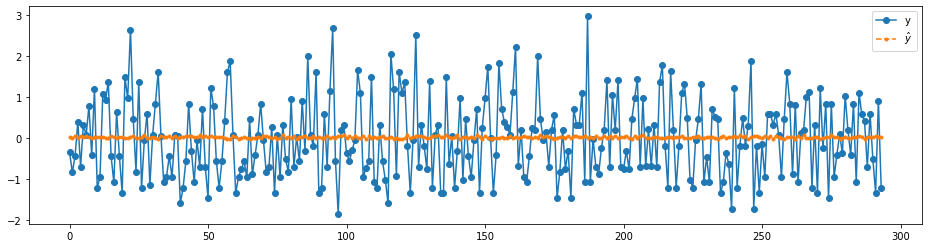

성능:  0.4739879537686339


In [ ]:
model = LinearRegressionGD(lr=0.0001)
model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

[Epoch 0] loss: 0.41
[Epoch 1] loss: 0.34
[Epoch 2] loss: 0.3
[Epoch 3] loss: 0.26
[Epoch 4] loss: 0.23
[Epoch 5] loss: 0.21
[Epoch 6] loss: 0.19
[Epoch 7] loss: 0.17
[Epoch 8] loss: 0.16
[Epoch 9] loss: 0.15


### **학습 후 성능평가**

성능:  0.15351539023020247


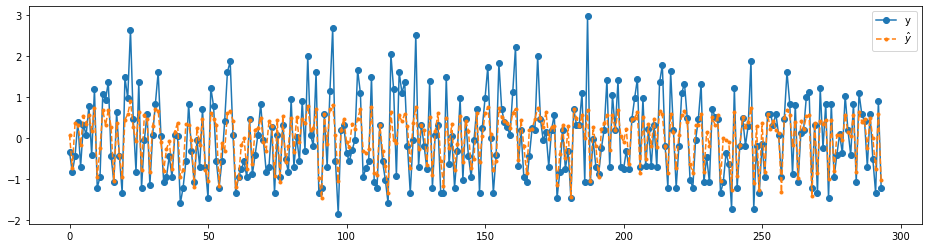

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습곡선**

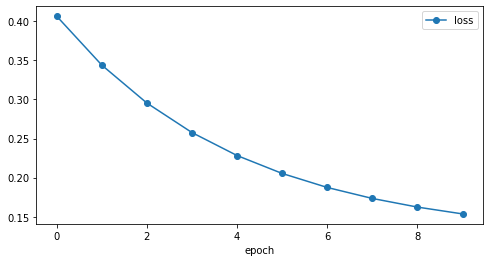

In [ ]:
model.draw_lcurve()

### **테스트셋 성능평가**

성능:  0.19394512225011865


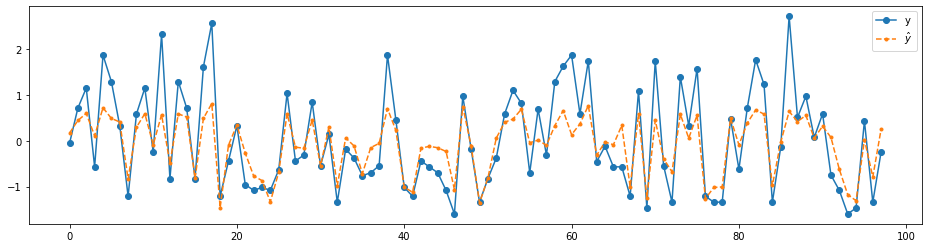

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = LinearRegressionGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.47
[Epoch 1] loss: 0.46
[Epoch 2] loss: 0.45
[Epoch 3] loss: 0.44
[Epoch 4] loss: 0.44
[Epoch 5] loss: 0.43
[Epoch 6] loss: 0.42
[Epoch 7] loss: 0.41
[Epoch 8] loss: 0.41
[Epoch 9] loss: 0.4
===== lr 1e-05 ==== 0.5039833941072436
[Epoch 0] loss: 0.4
[Epoch 1] loss: 0.34
[Epoch 2] loss: 0.29
[Epoch 3] loss: 0.26
[Epoch 4] loss: 0.23
[Epoch 5] loss: 0.21
[Epoch 6] loss: 0.19
[Epoch 7] loss: 0.18
[Epoch 8] loss: 0.16
[Epoch 9] loss: 0.16
===== lr 0.0001 ==== 0.196712839176915
[Epoch 0] loss: 0.14
[Epoch 1] loss: 0.12
[Epoch 2] loss: 0.11
[Epoch 3] loss: 0.11
[Epoch 4] loss: 0.11
[Epoch 5] loss: 0.11
[Epoch 6] loss: 0.1
[Epoch 7] loss: 0.1
[Epoch 8] loss: 0.1
[Epoch 9] loss: 0.1
===== lr 0.001 ==== 0.11744104604819279
[Epoch 0] loss: 40.7
[Epoch 1] loss: 5020.24
[Epoch 2] loss: 621979.89
[Epoch 3] loss: 77064449.26
[Epoch 4] loss: 9548438409.19
[Epoch 5] loss: 1183070532451.24
[Epoch 6] loss: 146584794927057.03
[Epoch 7] loss: 1.8162147999670724e+16
[Epoch 8] loss: 2.2503